Import libraries & Load Dataset

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('machine failure.csv')

Data Processing

In [58]:
# Fill missing values if any
data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)

# Convert categorical variables to numerical (if applicable)
data['Type'] = pd.factorize(data['Type'])[0]


C:\Users\Hassan Gilani\AppData\Local\Temp\ipykernel_5588\716671054.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\Hassan Gilani\AppData\Local\Temp\ipykernel_5588\716671054.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Feature Engineering

In [59]:
# Check if the columns exist before applying transformations
required_columns = [
    'Air temperature [K]', 'Process temperature [K]', 
    'Torque [Nm]', 'Tool wear [min]'
]

for col in required_columns:
    if col not in data.columns:
        print(f"Column {col} not found in the dataset.")
        data[col] = np.nan  # or handle it as needed

# Rolling statistics for continuous features
data['RollingMean_AirTemp_3'] = data['Air temperature [K]'].rolling(window=3, min_periods=1).mean()
data['RollingStd_AirTemp_3'] = data['Air temperature [K]'].rolling(window=3, min_periods=1).std()
data['RollingMean_ProcessTemp_3'] = data['Process temperature [K]'].rolling(window=3, min_periods=1).mean()
data['RollingStd_ProcessTemp_3'] = data['Process temperature [K]'].rolling(window=3, min_periods=1).std()

# Lag features
data['Lag1_Torque'] = data['Torque [Nm]'].shift(1).fillna(method='bfill')
data['Lag2_Torque'] = data['Torque [Nm]'].shift(2).fillna(method='bfill')
data['Lag1_ToolWear'] = data['Tool wear [min]'].shift(1).fillna(method='bfill')
data['Lag2_ToolWear'] = data['Tool wear [min]'].shift(2).fillna(method='bfill')


C:\Users\Hassan Gilani\AppData\Local\Temp\ipykernel_5588\3073463455.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Lag1_Torque'] = data['Torque [Nm]'].shift(1).fillna(method='bfill')
C:\Users\Hassan Gilani\AppData\Local\Temp\ipykernel_5588\3073463455.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Lag2_Torque'] = data['Torque [Nm]'].shift(2).fillna(method='bfill')
C:\Users\Hassan Gilani\AppData\Local\Temp\ipykernel_5588\3073463455.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Lag1_ToolWear'] = data['Tool wear [min]'].shift(1).fillna(method='bfill')
C:\Users\Hassan Gilani\AppData\Local\Temp\ipykernel_5588\3073463455.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will r

Define Features & Target

In [60]:
features = ['Type', 'Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 
            'OSF', 'RNF', 'RollingMean_AirTemp_3', 'RollingStd_AirTemp_3', 
            'RollingMean_ProcessTemp_3', 'RollingStd_ProcessTemp_3', 
            'Lag1_Torque', 'Lag2_Torque', 'Lag1_ToolWear', 'Lag2_ToolWear']
X = data[features]
y = data['Machine failure']

# Ensure all columns in X are numeric and handle any remaining non-numeric columns
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale numeric features only
numeric_features = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train & Test the model

In [65]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

Evaluate the model

In [66]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [67]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1939    0]
 [   2   59]]


Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Air Temperature Distribution')

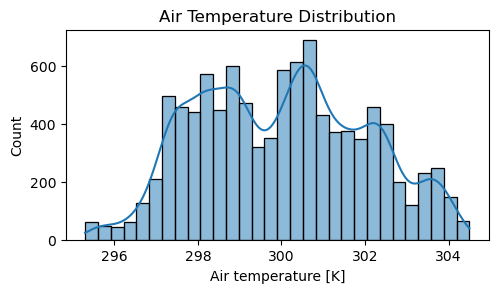

In [69]:
# Feature Distributions
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Air temperature [K]'], kde=True, bins=30)
plt.title('Air Temperature Distribution')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Process Temperature Distribution')

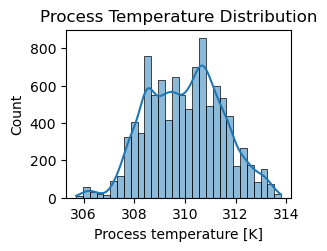

In [70]:
plt.subplot(2, 2, 2)
sns.histplot(data['Process temperature [K]'], kde=True, bins=30)
plt.title('Process Temperature Distribution')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Torque Distribution')

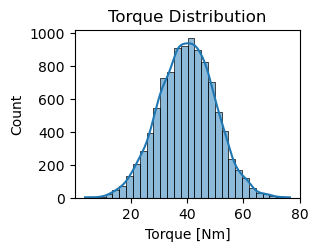

In [71]:
plt.subplot(2, 2, 3)
sns.histplot(data['Torque [Nm]'], kde=True, bins=30)
plt.title('Torque Distribution')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


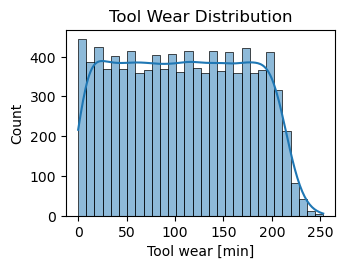

In [72]:
plt.subplot(2, 2, 4)
sns.histplot(data['Tool wear [min]'], kde=True, bins=30)
plt.title('Tool Wear Distribution')

plt.tight_layout()
plt.show()

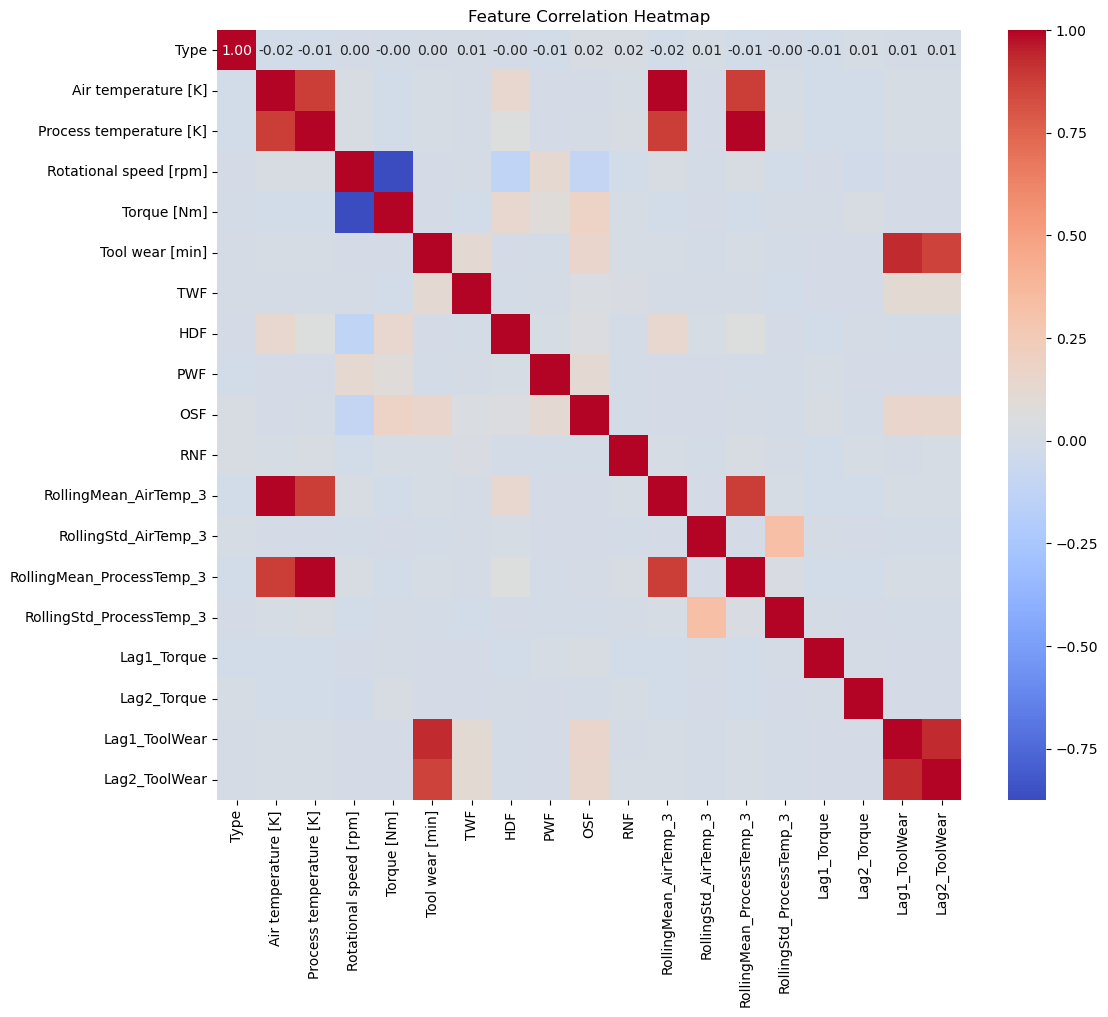

In [73]:
# Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = data[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [74]:
# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


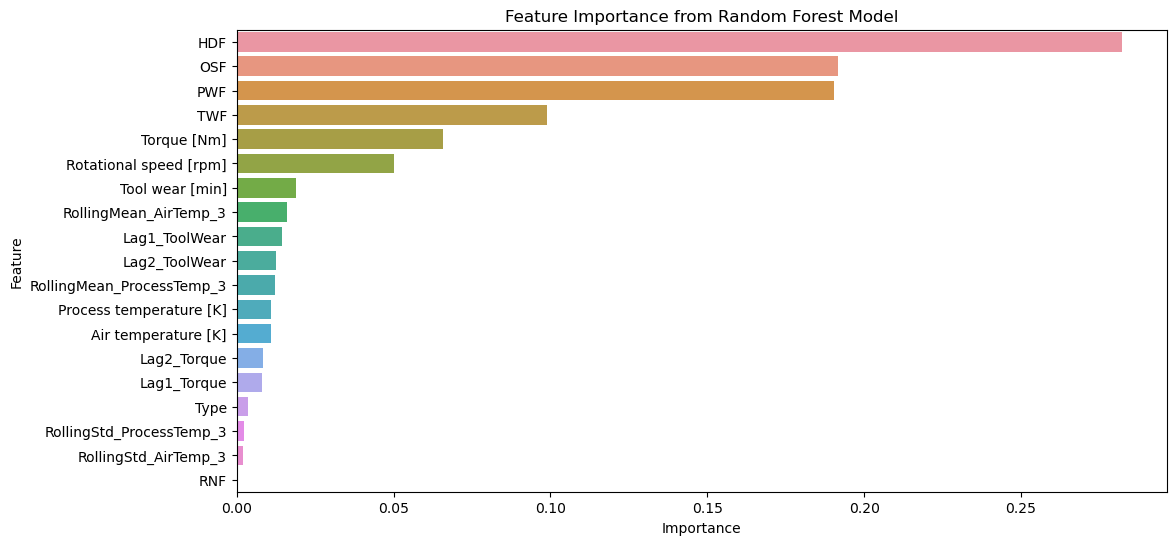

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()

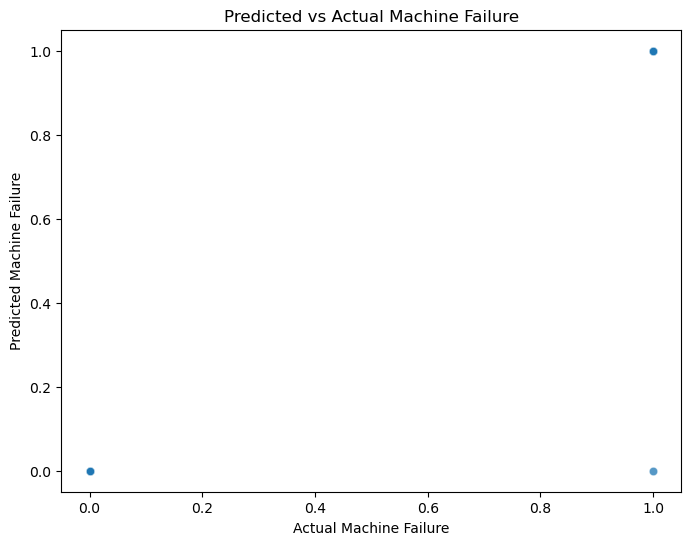

In [76]:
# Predictions vs Actuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Machine Failure')
plt.ylabel('Predicted Machine Failure')
plt.title('Predicted vs Actual Machine Failure')
plt.show()
